In [1]:
import tensorflow as tf
from tensorflow import keras


/home/shreya/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/shreya/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/shreya/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/shreya/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

1.14.0


In [4]:
fashion_mnist=keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels),(test_images, test_labels)=fashion_mnist.load_data()

In [6]:
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

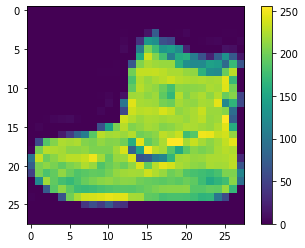

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images=train_images/255.0
test_images=test_images/255.0

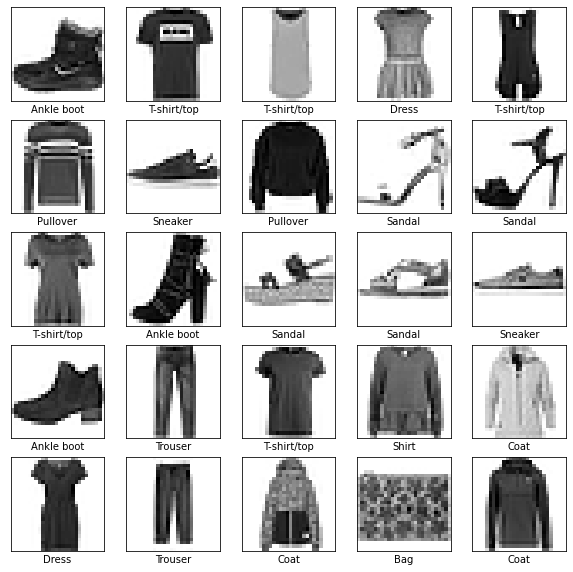

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])
plt.show()

In [15]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.5015 - acc: 0.8245
Epoch 2/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3738 - acc: 0.8653
Epoch 3/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3348 - acc: 0.8783
Epoch 4/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3100 - acc: 0.8853
Epoch 5/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2915 - acc: 0.8912
Epoch 6/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2777 - acc: 0.8966
Epoch 7/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2651 - acc: 0.9010
Epoch 8/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2560 - acc: 0.9043
Epoch 9/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2457 - acc: 0.9082
Epoch 10/10
60000/60000 [==============================] - 2s 40us/sample - loss: 

In [18]:
test_loss, test_acc=model.evaluate(test_images,test_labels)
print('Test accuracy: ',test_acc)

10000/10000 [==============================] - 0s 23us/sample - loss: 0.3217 - acc: 0.8891
Test accuracy:  0.8891


In [19]:
predictions=model.predict(test_images)

In [20]:
predictions[0]

array([3.9004476e-07, 2.4566768e-10, 5.8753962e-09, 9.8916971e-08,
       3.2617738e-08, 3.0950438e-03, 2.6772102e-07, 6.1143808e-02,
       4.9040500e-06, 9.3575549e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img=predictions_array[i], true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label=np.argmax(predictions_array)
    if(predicted_label==true_label):
        color='blue'
    else:
        color='red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                         100*np.max(predictions_array),
                                         class_name[true_label]),
                                         color=color)
    
def plot_value_array(i, predictions_array,true_label):
    predictions_array , true_label=predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
        
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

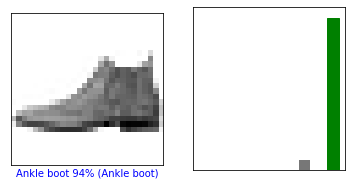

In [24]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,test_labels)
plt.show()

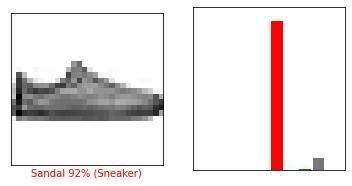

In [25]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

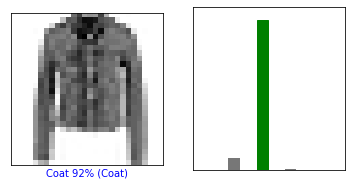

In [26]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

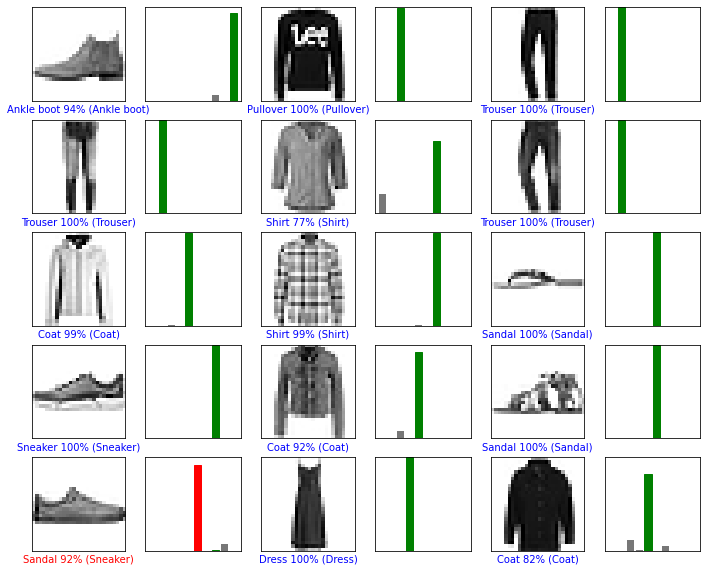

In [27]:
num_rows =5
num_cols=3
num_images =num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i, predictions, test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [28]:
img =test_images[0]
print(img.shape)

(28, 28)


In [29]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = model.predict(img)
print(predictions_single)

[[3.9004476e-07 2.4566768e-10 5.8753962e-09 9.8916786e-08 3.2617738e-08
  3.0950452e-03 2.6772102e-07 6.1143838e-02 4.9040500e-06 9.3575549e-01]]


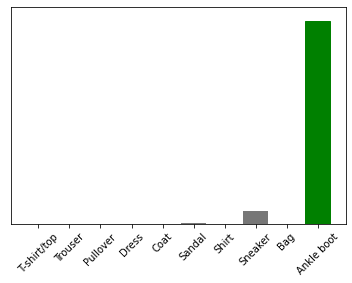

In [32]:
plot_value_array(0,predictions_single,test_labels)
_=plt.xticks(range(10),class_name,rotation=45)

In [33]:
np.argmax(predictions_single[0])

9